### This notebook builds a KNN Model using Sift

#Load my data (Croped images from the video)

In [7]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!gdown https://drive.google.com/uc?id=1DG1NGS33zJL1X_fe1iNsUihC25aPOywa

Downloading...
From: https://drive.google.com/uc?id=1DG1NGS33zJL1X_fe1iNsUihC25aPOywa
To: /content/cropsandgrass.zip
100% 994M/994M [00:15<00:00, 65.1MB/s]


In [9]:
!ls

cropsandgrass.zip  sample_data


In [10]:
!unzip cropsandgrass.zip

Archive:  cropsandgrass.zip
  inflating: data/sugarcane/sugarcane_114.jpg  
  inflating: data/sugarcane/sugarcane_103.jpg  
  inflating: data/sugarcane/sugarcane_94.jpg  
  inflating: data/sugarcane/sugarcane_87.jpg  
  inflating: data/sugarcane/sugarcane_100.jpg  
  inflating: data/sugarcane/sugarcane_83.jpg  
  inflating: data/sugarcane/sugarcane_95.jpg  
  inflating: data/sugarcane/sugarcane_106.jpg  
  inflating: data/sugarcane/sugarcane_92.jpg  
  inflating: data/sugarcane/sugarcane_84.jpg  
  inflating: data/sugarcane/sugarcane_108.jpg  
  inflating: data/sugarcane/sugarcane_105.jpg  
  inflating: data/sugarcane/sugarcane_91.jpg  
  inflating: data/sugarcane/sugarcane_90.jpg  
  inflating: data/sugarcane/sugarcane_107.jpg  
  inflating: data/sugarcane/sugarcane_97.jpg  
  inflating: data/sugarcane/sugarcane_113.jpg  
  inflating: data/sugarcane/sugarcane_111.jpg  
  inflating: data/sugarcane/sugarcane_110.jpg  
  inflating: data/sugarcane/sugarcane_112.jpg  
  inflating: data/sug

# Import Libraries

In [11]:
import os
import shutil
import glob
import random
import cv2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score

# Organize the dataset

In [12]:
os.makedirs("./train")
os.makedirs("./test")

In [13]:
cassava = len(os.listdir('./data/cassava'))
maize = len(os.listdir('./data/maize'))
sugarcane = len(os.listdir('./data/sugarcane'))
grass = len(os.listdir('./data/grass'))

In [14]:
print(f"{cassava} Cassava Images")
print(f"{maize} Maize Images")
print(f"{sugarcane} SugarCane Images")
print(f"{grass} Grass Images")

317 Cassava Images
304 Maize Images
114 SugarCane Images
287 Grass Images


In [15]:
train_data = []
for img in glob.glob('./data/cassava/*.jpg'):
  train_data.append((img,0))

for img in glob.glob('./data/maize/*.jpg'):
  train_data.append((img, 1))

for img in glob.glob('./data/sugarcane/*.jpg'):
  train_data.append((img, 2))

for img in glob.glob('./data/grass/*.jpg'):
  train_data.append((img, 3))

In [16]:
train_data = pd.DataFrame(train_data, columns=['plant', 'label'],index=None)
train_data['label'].value_counts()

0    317
1    304
3    287
2    114
Name: label, dtype: int64

In [17]:
train_data.head()

,plant,label
0,./data/cassava/cassava_152.jpg,0
1,./data/cassava/cassava_229.jpg,0
2,./data/cassava/cassava_283.jpg,0
3,./data/cassava/cassava_261.jpg,0
4,./data/cassava/cassava_16.jpg,0


# Data Visualization

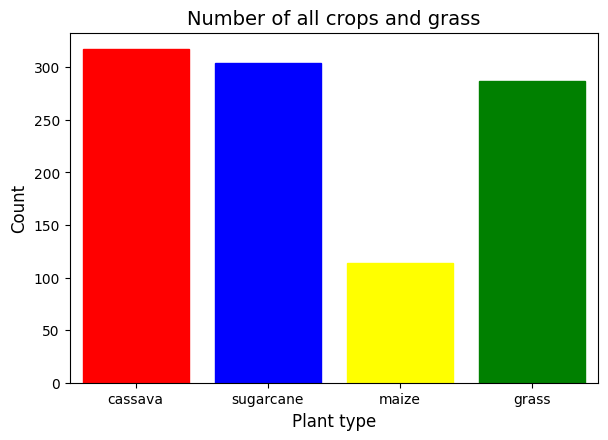

In [18]:
#Plot the data
plant_count = train_data['label'].value_counts()
plt.figure(figsize=(15,10))
plt.subplot(221)
ax = sns.barplot(x=plant_count.index, y= plant_count.values)
plt.title('Number of all crops and grass', fontsize=14)
plt.xlabel('Plant type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(plant_count.index)), ['cassava', 'sugarcane', 'maize', 'grass']),

ax.patches[0].set_color('red')
ax.patches[1].set_color('blue')
ax.patches[2].set_color('yellow')
ax.patches[3].set_color('green')
plt.show()

In [19]:
cassava_samples = (train_data[train_data['label']==0]['plant'].iloc[:5]).tolist()
sugarcane_samples = (train_data[train_data['label']==1]['plant'].iloc[:5]).tolist()
maize_samples = (train_data[train_data['label']==2]['plant'].iloc[:5]).tolist()
grass_samples = (train_data[train_data['label']==3]['plant'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = cassava_samples + sugarcane_samples + maize_samples + grass_samples

In [20]:
print(samples)

['./data/cassava/cassava_152.jpg', './data/cassava/cassava_229.jpg', './data/cassava/cassava_283.jpg', './data/cassava/cassava_261.jpg', './data/cassava/cassava_16.jpg', './data/maize/maize_197.jpg', './data/maize/maize_18.jpg', './data/maize/maize_224.jpg', './data/maize/maize_108.jpg', './data/maize/maize_23.jpg', './data/sugarcane/sugarcane_58.jpg', './data/sugarcane/sugarcane_20.jpg', './data/sugarcane/sugarcane_33.jpg', './data/sugarcane/sugarcane_13.jpg', './data/sugarcane/sugarcane_18.jpg', './data/grass/grass_104.jpg', './data/grass/grass_119.jpg', './data/grass/grass_96.jpg', './data/grass/grass_275.jpg', './data/grass/grass_239.jpg']


In [21]:
# Plot the data
f, ax = plt.subplots(4, 5, figsize=(30, 10))
for i in range(20):
    img = Image.open(samples[i])
    ax[i // 5, i % 5].imshow(img)
    ax[i // 5, i % 5].axis('off')
    ax[i // 5, i % 5].set_aspect('auto')
    ax[i // 5, i % 5].set_title(samples[i].split("/")[-1])  # Show the image name as the title
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Prepare the data for training

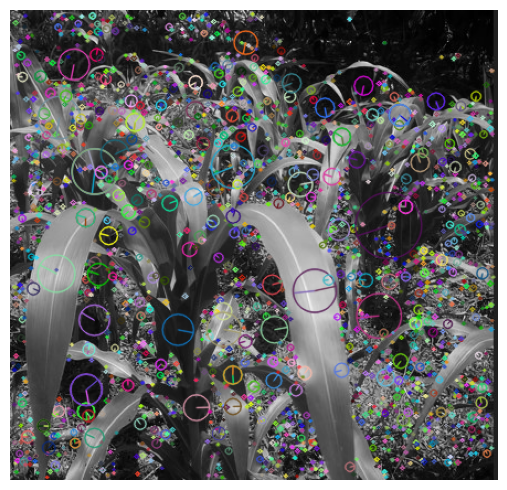

In [22]:
path = './data'
image_paths = []

min_size = 100
max_size = 500

for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            img = cv2.imread(file_path)
            height, width, _ = img.shape
            if min_size <= height <= max_size and min_size <= width <= max_size:
                image_paths.append(file_path)

plt.figure(figsize=(10, 5))

for i, image_path in enumerate(image_paths):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp = sift.detect(gray, None)
    img = cv2.drawKeypoints(gray, kp, img)
    img = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    plt.subplot(1, len(image_paths), i+1)  # Display the images dynamically based on the number of collected images
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [23]:
path = './data'
image_path = []
for file in os.listdir(path):
  dir = os.path.join(path, file)
  for file in os.listdir(dir):
    image_path.append(os.path.join(dir, file))

In [24]:
len(image_path)

1022

In [25]:
def CalcFeatures(img, target_size):
    # Resize the image to the target size
    resized_img = cv2.resize(img, target_size)

    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(resized_img, None)
    return des

target_size = (256, 256)  # Set the desired target size for resizing

features = []
for file in image_path:
    img = cv2.imread(file, 0)

    if img is not None:
        img_des = CalcFeatures(img, target_size)
        if img_des is not None:
            features.append(img_des)

if features:
    features = np.vstack(features)
else:
    print("No features extracted from the images.")

In [26]:
features.shape

(857193, 128)

In [27]:
def kmean_bow (features, num_clusters):
  # bof_dict = []
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
  flags = cv2.KMEANS_RANDOM_CENTERS
  compactness, labels, centers = cv2.kmeans(features, num_clusters, None, criteria, 10, flags)
  return centers

centers = kmean_bow(features, 100)

In [28]:
def bag_of_features(features, centres, num_clusters):
  vec = np.zeros((1, num_clusters))
  for i in range(features.shape[0]):
    feat = features[i]
    diff = np.tile(feat, (num_clusters, 1)) - centres
    dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
    idx_dist = dist.argsort()
    idx = idx_dist[0]
    vec[0][idx] += 1

  return vec

In [29]:
def CalcFeatures(img, target_size):
    img_resized = cv2.resize(img, target_size)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img_resized, None)
    return des

labels = []
X = []
target_size = (256, 256)

for file in image_path:
    img = cv2.imread(file, 0)
    img_desc = CalcFeatures(img, target_size)
    if img_desc is not None:
        img_vec = bag_of_features(img_desc, centers, 100)
        X.append(img_vec)
        labels.append(file.split('/')[2])

X = np.vstack(X)

In [30]:
print(labels)
X.shape, len(labels)

['grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 'grass', 

((1022, 100), 1022)

In [31]:
labels = LabelEncoder().fit_transform(labels)
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=10).fit_transform(X_scaled)

In [32]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.3, random_state=0, stratify=labels)

In [33]:
# Print the sizes of each set
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))

Train set size: 715
Test set size: 307


# Train KNN model

In [34]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [35]:
#fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [36]:
#Predict on the test set
knn_pred = knn.predict(X_test)

In [37]:
#Classification report
pd.DataFrame(classification_report(y_test, knn_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.872549,0.936842,0.903553,95.000000
1,0.976190,0.953488,0.964706,86.000000
2,0.900000,0.880435,0.890110,92.000000
3,1.000000,0.911765,0.953846,34.000000
accuracy,0.921824,0.921824,0.921824,0.921824
macro avg,0.937185,0.920632,0.928054,307.000000
weighted avg,0.923924,0.921824,0.922225,307.000000


#Confusion Matrix


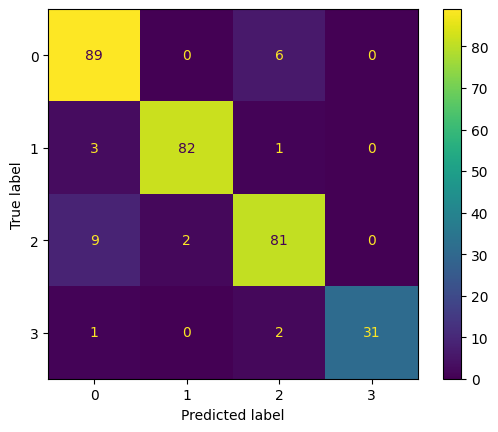

In [38]:
cm = confusion_matrix(y_test, knn_pred)
ConfusionMatrixDisplay(cm).plot()